In [1]:
from preprocessing_functions import *
from topic_modeling_functions import *
import warnings
warnings.filterwarnings('ignore')

C:\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\venv_citynet3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


### Import Lemmatised Paragraphs

In [20]:
INPUT_DIR = "../../../../../data/clean/city_pair_paragraphs3/"
BATCHES = [5]
POS = ["NOUN", "VERB", "ADJ"]
ONLY_ENGLISH_WORDS = True
sort_by_paragraphs_count = True
merged_POS = True

data_list = import_lemmatised_paragraphs(INPUT_DIR, POS, BATCHES, ONLY_ENGLISH_WORDS=ONLY_ENGLISH_WORDS, merged_POS=merged_POS, sort_by_paragraphs=sort_by_paragraphs_count)

BATCHES: ['5']:   0%|          | 0/1 [00:00<?, ?it/s]

City Pair:   0%|          | 0/10 [00:00<?, ?it/s]

### Create Single Dataframe

In [109]:
frames = [citypair['lemmatized_paragraphs'] for citypair in data_list]
citypairs = [citypair['city_pair'] for citypair in data_list]

result = pd.concat(frames) #, keys=citypairs)
result.set_index('paragraph_id', inplace=True)
result.sort_index(inplace=True)
result.reset_index(inplace=True)
result
# paris_london = result.loc["paris_london"]
# paris_london.set_index('paragraph_id', inplace=True)
# paris_london

result #.iloc[21051]

,paragraph_id,city_pair,paragraph,merged_POS
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide..."
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group..."
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci..."
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo..."
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde..."
...,...,...,...,...
50491,50891,paris_milan,the impressions that he had made by his speech...,"[impression, speech, debate, invitation, repre..."
50492,50892,paris_milan,a journey to paris in 1790 provided him furthe...,"[journey, acquaintance, idea, year, city, gran..."
50493,50893,paris_milan,the 1993–94 uefa champions league was the 39th...,"[season, club, football, tournament, season, l..."
50494,50894,paris_milan,kaya has been modeling since the age of 14. sh...,"[age, street, career, fashion, world, catalogu..."


In [117]:
result.merged_POS

0        [tenure, academia, month, year, travel, incide...
1        [astronomer, search, priest, invitation, group...
2        [plenty, air, connection, city, connection, ci...
3        [fashion, year, language, monitor, ranking, wo...
4        [commuter, belt, area, datum, population, orde...
                               ...                        
50491    [impression, speech, debate, invitation, repre...
50492    [journey, acquaintance, idea, year, city, gran...
50493    [season, club, football, tournament, season, l...
50494    [age, street, career, fashion, world, catalogu...
50495    [art, drama, costume, clothing, designer, desi...
Name: merged_POS, Length: 50496, dtype: object

In [123]:
indexes = result.index[result['city_pair'] == 'paris_london'].tolist()
min(indexes), max(indexes)
#indexes[0][1], indexes[-1][1]

(22917, 43967)

### Training Multiple LDA Models

In [ ]:
TOPIC_SELECTION = range(2,21,1)
list(TOPIC_SELECTION)

In [ ]:
os.path.exists("../../../../../data/clean/lda_models/50k_paragraphs/0.05min_0.9max/lda_model_2topics_0.05min_0.9max")

In [ ]:
%%time

TOPIC_SELECTION = range(2,21, 1)
paragraphs = result.merged_POS
MIN_DF = 0.1
MAX_DF = 0.8

# Vectorization
dictionary, corpus = vectorize(paragraphs, MIN_DF=MIN_DF, MAX_DF=MAX_DF)

models = compare_lda_models(OUTPUT_DIR='../../../../../data/clean/lda_models/50k_paragraphs/', TOPIC_SELECTION=TOPIC_SELECTION,
                LEMMATIZED_TEXT=paragraphs, DICTIONARY=dictionary, CORPUS=corpus, MIN_DF=MIN_DF, MAX_DF=MAX_DF, N_ITERATIONS=1000,
                PATH_TO_MALLET=r'C:/mallet/bin/mallet.bat', GET_COHERENCE_SCORE=True, COHERENCE='c_v')

In [ ]:
p = '../../../../../data/clean/lda_models/50k_paragraphs/0.05min_0.9max/'
n = f"lda_model_2topics_0.05min_0.9max"
#os.path.join(directory, f"{NAME}_visualisation.html")
print(os.path.exists(os.path.join(p, n)))

### Load Multiple LDA Models

In [ ]:
%%time

loaded_models = load_lda_models(INPUT_DIR='../../../../../data/clean/lda_models/50k_paragraphs/', LOAD_VIS=True,
                                LOAD_DICT=True, LOAD_COHERENCE_SCORE=True)

In [ ]:
for model in loaded_models:
    if len(model['model'].show_topics(50)) != 10:
        print(len(model['model'].show_topics(50)), model['coherence_score'])
        print()
#     try:
#         print(len(model['model'].show_topics(50)))
#     except:
#         print('check')
loaded_models[13]['visualisation']

In [ ]:
result
# len(result.paragraph)


In [ ]:
# list(new_df[new_df['paragraph_id'] == 23065]['merged_POS'])[0]
#[data_list[1]['lemmatized_paragraphs']['paragraph_id'] == 21065]

In [ ]:
loaded_models[8]['visualisation']

### Load Chosen Model

In [ ]:
import pickle

f = '../../../../../data/clean/lda_models/50k_paragraphs/0_05MIN_0_9MAX/lda_model_8topics_0_05min_0_9max/lda_model_8topics_0_05min_0_9max_texts.pickle'

with open(f, 'rb') as fp:
                    a = pickle.load(fp)

a

In [6]:
P = "../../../../../data/clean/lda_models/50k_paragraphs/0_05MIN_0_9MAX/lda_model_8topics_0_05min_0_9max/"
# P = "../../../../../data/clean/lda_models/50k_paragraphs/lda_model_8topics_0_1min_0_8max"
P = os.path.abspath(P)
model = load_lda_model(P, LOAD_VIS=True, LOAD_DICT=True, LOAD_TEXTS=True, LOAD_COHERENCE_SCORE=True)

# for file in os.listdir(P):
#     #model = gensim.models.LdaModel.load(P)
    
    
#     if 'dictionary' in file:
#         print(os.path.exists(os.path.abspath(os.path.join(P, file))))
#         # print(os.path.exists())


# os.path.exists(os.path.join(P, os.listdir(P)[-1]))
# os.path.exists('../../../../../data/clean/lda_models/50k_paragraphs/0_05MIN_0_9MAX/lda_model_8topics_0.05min_0.9max/lda_model_8topics_0.05min_0.9max_dictionary.dict')

In [7]:
model.keys()

dict_keys(['model', 'coherence_score', 'visualisation', 'texts', 'dictionary'])

In [9]:
model['coherence_score']

0.6394110963448674

In [10]:
model['visualisation']

In [55]:
"""
model.show_topic() to lydavis topic:
topic 1 --> topic 2: Culture
topic 2 --> topic 4: Education
topic 3 --> topic 7 Traveling
topic 4 --> topic 6 Fashion
topic 5 --> topic 1 Writing
topic 6 --> topic 3 Politics
topic 7 --> topic 8 Sport
topic 8 --> topic 5 Art
"""

topic_1    10561
topic_2     7580
topic_5     7507
topic_8     7049
topic_6     5915
topic_4     5361
topic_3     3522
topic_7     3001
dtype: int64

### Word Topic Distribution

In [15]:
N_TOPICS = 8
MAX_WORDS = 20

for i in range(N_TOPICS):
    topic_words = model['model'].show_topic(i, topn=MAX_WORDS)
    print(i+1, [(x[0], round(x[1], 3)) for x in topic_words])
    print()

1 [('opera', 0.035), ('festival', 0.024), ('perform', 0.023), ('film', 0.021), ('music', 0.018), ('include', 0.015), ('orchestra', 0.014), ('tour', 0.013), ('concert', 0.013), ('performance', 0.012), ('play', 0.012), ('role', 0.012), ('symphony', 0.01), ('theatre', 0.009), ('debut', 0.009), ('production', 0.008), ('sing', 0.008), ('record', 0.008), ('year', 0.008), ('work', 0.008)]

2 [('study', 0.047), ('school', 0.023), ('bear', 0.022), ('year', 0.017), ('work', 0.016), ('professor', 0.011), ('university', 0.011), ('move', 0.011), ('member', 0.009), ('graduate', 0.009), ('receive', 0.008), ('attend', 0.008), ('return', 0.008), ('art', 0.008), ('college', 0.008), ('society', 0.008), ('father', 0.008), ('family', 0.008), ('teach', 0.007), ('student', 0.007)]

3 [('city', 0.016), ('service', 0.013), ('flight', 0.011), ('route', 0.01), ('air', 0.008), ('line', 0.008), ('airline', 0.007), ('train', 0.007), ('include', 0.007), ('station', 0.007), ('operate', 0.006), ('time', 0.006), ('airc

### Document Topic Distribution

In [68]:
l = [topic+1 for topic in range(8)]

d = {}
for x in l:
    d[f"topic_{x}"] = ''

In [454]:
import pandas as pd

transformed_docs = model['model'].load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i+1) for i in range(N_TOPICS)])

topic_distributions_renamed_cols=topic_distributions.rename(columns = {  'topic_1': 'Culture',
                                        'topic_2': 'Education',
                                        'topic_3': 'Traveling',
                                        'topic_4': 'Fashion',
                                        'topic_5': 'Writing',
                                        'topic_6': 'Politics',
                                        'topic_7': 'Sport',
                                        'topic_8': 'Art'}, inplace = False)

In [455]:
topic_distributions_renamed_cols

,Culture,Education,Traveling,Fashion,Writing,Politics,Sport,Art
0,0.002311,0.002249,0.001061,0.001583,0.865177,0.125048,0.000734,0.001837
1,0.001658,0.001613,0.000761,0.001136,0.938653,0.001312,0.035876,0.018992
2,0.002636,0.030673,0.956849,0.001806,0.003018,0.002086,0.000837,0.002095
3,0.058875,0.004913,0.002317,0.918505,0.005780,0.003995,0.001604,0.004012
4,0.008101,0.007883,0.953772,0.005549,0.009274,0.006410,0.002573,0.006438
...,...,...,...,...,...,...,...,...
50491,0.002793,0.121843,0.001282,0.001913,0.003198,0.478709,0.000887,0.389375
50492,0.002014,0.023429,0.000924,0.001379,0.367282,0.602732,0.000640,0.001600
50493,0.001548,0.001507,0.000710,0.001061,0.001773,0.050748,0.941423,0.001230
50494,0.002879,0.186974,0.001321,0.800050,0.003296,0.002278,0.000914,0.002288


In [456]:
topic_distributions_renamed_cols.idxmax(axis="columns").value_counts()

Culture      10561
Education     7580
Writing       7507
Art           7049
Politics      5915
Fashion       5361
Traveling     3522
Sport         3001
dtype: int64

In [458]:
topic_distributions_renamed_cols_no_writing = topic_distributions_renamed_cols.drop('Writing', axis=1) 

In [459]:
topic_distributions_renamed_cols

,Culture,Education,Traveling,Fashion,Writing,Politics,Sport,Art
0,0.002311,0.002249,0.001061,0.001583,0.865177,0.125048,0.000734,0.001837
1,0.001658,0.001613,0.000761,0.001136,0.938653,0.001312,0.035876,0.018992
2,0.002636,0.030673,0.956849,0.001806,0.003018,0.002086,0.000837,0.002095
3,0.058875,0.004913,0.002317,0.918505,0.005780,0.003995,0.001604,0.004012
4,0.008101,0.007883,0.953772,0.005549,0.009274,0.006410,0.002573,0.006438
...,...,...,...,...,...,...,...,...
50491,0.002793,0.121843,0.001282,0.001913,0.003198,0.478709,0.000887,0.389375
50492,0.002014,0.023429,0.000924,0.001379,0.367282,0.602732,0.000640,0.001600
50493,0.001548,0.001507,0.000710,0.001061,0.001773,0.050748,0.941423,0.001230
50494,0.002879,0.186974,0.001321,0.800050,0.003296,0.002278,0.000914,0.002288


In [460]:
updated_results = pd.concat([result, topic_distributions_renamed_cols],
                  axis = 1)
updated_results

,paragraph_id,city_pair,paragraph,merged_POS,Culture,Education,Traveling,Fashion,Writing,Politics,Sport,Art
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0.002311,0.002249,0.001061,0.001583,0.865177,0.125048,0.000734,0.001837
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group...",0.001658,0.001613,0.000761,0.001136,0.938653,0.001312,0.035876,0.018992
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",0.002636,0.030673,0.956849,0.001806,0.003018,0.002086,0.000837,0.002095
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo...",0.058875,0.004913,0.002317,0.918505,0.005780,0.003995,0.001604,0.004012
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",0.008101,0.007883,0.953772,0.005549,0.009274,0.006410,0.002573,0.006438
...,...,...,...,...,...,...,...,...,...,...,...,...
50491,50891,paris_milan,the impressions that he had made by his speech...,"[impression, speech, debate, invitation, repre...",0.002793,0.121843,0.001282,0.001913,0.003198,0.478709,0.000887,0.389375
50492,50892,paris_milan,a journey to paris in 1790 provided him furthe...,"[journey, acquaintance, idea, year, city, gran...",0.002014,0.023429,0.000924,0.001379,0.367282,0.602732,0.000640,0.001600
50493,50893,paris_milan,the 1993–94 uefa champions league was the 39th...,"[season, club, football, tournament, season, l...",0.001548,0.001507,0.000710,0.001061,0.001773,0.050748,0.941423,0.001230
50494,50894,paris_milan,kaya has been modeling since the age of 14. sh...,"[age, street, career, fashion, world, catalogu...",0.002879,0.186974,0.001321,0.800050,0.003296,0.002278,0.000914,0.002288


In [652]:
updated_results_final.to_csv('classified_citypairs.csv', index=False)

In [461]:
updated_results_final =pd.concat([updated_results, updated_results[topic_distributions_renamed_cols.columns].agg(['idxmax','max'],axis=1)], axis=1)
updated_results_final

,paragraph_id,city_pair,paragraph,merged_POS,Culture,Education,Traveling,Fashion,Writing,Politics,Sport,Art,idxmax,max
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide...",0.002311,0.002249,0.001061,0.001583,0.865177,0.125048,0.000734,0.001837,Writing,0.865177
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group...",0.001658,0.001613,0.000761,0.001136,0.938653,0.001312,0.035876,0.018992,Writing,0.938653
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",0.002636,0.030673,0.956849,0.001806,0.003018,0.002086,0.000837,0.002095,Traveling,0.956849
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo...",0.058875,0.004913,0.002317,0.918505,0.005780,0.003995,0.001604,0.004012,Fashion,0.918505
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde...",0.008101,0.007883,0.953772,0.005549,0.009274,0.006410,0.002573,0.006438,Traveling,0.953772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50491,50891,paris_milan,the impressions that he had made by his speech...,"[impression, speech, debate, invitation, repre...",0.002793,0.121843,0.001282,0.001913,0.003198,0.478709,0.000887,0.389375,Politics,0.478709
50492,50892,paris_milan,a journey to paris in 1790 provided him furthe...,"[journey, acquaintance, idea, year, city, gran...",0.002014,0.023429,0.000924,0.001379,0.367282,0.602732,0.000640,0.001600,Politics,0.602732
50493,50893,paris_milan,the 1993–94 uefa champions league was the 39th...,"[season, club, football, tournament, season, l...",0.001548,0.001507,0.000710,0.001061,0.001773,0.050748,0.941423,0.001230,Sport,0.941423
50494,50894,paris_milan,kaya has been modeling since the age of 14. sh...,"[age, street, career, fashion, world, catalogu...",0.002879,0.186974,0.001321,0.800050,0.003296,0.002278,0.000914,0.002288,Fashion,0.80005


### By City

In [280]:
city_pairs = updated_results['city_pair'].unique()
print(city_pairs)
chosen_city_pair = city_pairs[3] # 'paris_london'

chosen_city_pair_df = updated_results_final[updated_results_final['city_pair']==chosen_city_pair]
chosen_city_pair_df

['berlin_milan' 'london_berlin' 'london_madrid' 'london_milan'
 'madrid_berlin' 'madrid_milan' 'paris_berlin' 'paris_london'
 'paris_madrid' 'paris_milan']


,paragraph_id,city_pair,paragraph,merged_POS,Culture,Education,Traveling,Fashion,Writing,Politics,Sport,Art,idxmax,max
10631,10685,london_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci...",0.002636,0.002566,0.984956,0.001806,0.003018,0.002086,0.000837,0.002095,Traveling,0.984956
10632,10686,london_milan,in some sense also 'ambrosians' are the member...,"[sense, ambrosian, member, society, archbishop...",0.001751,0.001704,0.000803,0.001199,0.580597,0.356006,0.000556,0.057384,Writing,0.580597
10633,10687,london_milan,save the children has been arsenal global char...,"[child, charity, partner, project, safety, chi...",0.002431,0.391186,0.001116,0.001665,0.028705,0.001924,0.571041,0.001932,Sport,0.571041
10634,10688,london_milan,barcelona was the 20th-most-visited city in th...,"[city, world, visitor, city, visitor, visitor,...",0.005658,0.005506,0.002596,0.788034,0.187437,0.004476,0.001797,0.004496,Fashion,0.788034
10635,10689,london_milan,from 2008 the bombay sapphire designer glass c...,"[designer, glass, competition, design, place, ...",0.012377,0.012045,0.005679,0.008478,0.014169,0.009793,0.399800,0.537660,Art,0.53766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13138,13203,london_milan,julie wimmer was born in 1975. after graduatin...,"[school, year, child, book, illustration, semi...",0.003282,0.668035,0.001506,0.037240,0.038749,0.002597,0.001042,0.247550,Education,0.668035
13139,13204,london_milan,pellegrini is a former member of the london-ba...,"[member, art, arc, group, arc, member, art, ho...",0.042763,0.003569,0.001683,0.002512,0.004198,0.002901,0.001165,0.941210,Art,0.94121
13140,13205,london_milan,the airport has daily feeder flights to warsaw...,"[airport, feeder, flight, lot, polish, airline...",0.004791,0.004662,0.972662,0.003282,0.005484,0.003791,0.001522,0.003807,Traveling,0.972662
13141,13206,london_milan,in 2016 it was announced that liam mckahey and...,"[recording, studio, music, era, band, x, end, ...",0.780769,0.003086,0.001455,0.002172,0.206482,0.002509,0.001007,0.002520,Writing,0.206482


In [281]:
topic_columns = ['Education', 'Traveling', 'Fashion', 'Writing', 'Politics', 'Sport', 'Art']
#chosen_city_pair_df['dominant_topic'] = chosen_city_pair_df[topic_columns].idxmax(axis="columns")# .value_counts()

In [333]:
updated_results_final['idxmax'].value_counts()

Culture      12777
Education     8901
Art           8302
Politics      7266
Fashion       6073
Traveling     3972
Sport         3205
Name: idxmax, dtype: int64

Text(0, 0.5, 'Density')

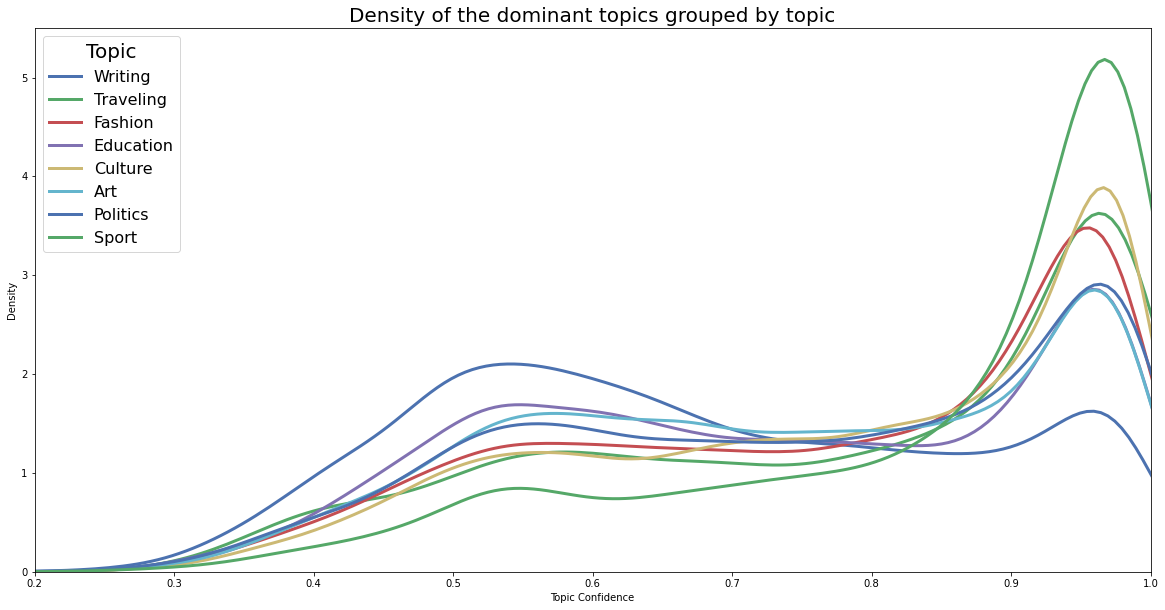

In [493]:
# !pip install seaborn
import seaborn as sns

plt.figure(figsize=(20,10))
a = updated_results_final.groupby('idxmax')

# Iterate through the five airlines
for topic in updated_results_final['idxmax'].unique():
    b = a['max'].get_group(topic)

    sns.distplot(b, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = topic)
    
# Plot formatting

plt.legend(prop={'size': 16}, title = 'Topic', title_fontsize=20)
plt.title('Density of the dominant topics grouped by topic', fontsize=20)
plt.xlabel('Topic Confidence')
plt.ylim(0, 5.5)
plt.xlim(0.2, 1)
plt.ylabel('Density')

In [532]:
a = updated_results_final.groupby('idxmax')
a['max'] #a.get_group(topic)

In [569]:
len(updated_results_final['idxmax'].unique())

8

<AxesSubplot:xlabel='max', ylabel='Density'>

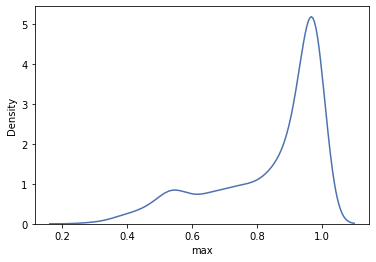

In [572]:
sns.kdeplot(a['max'].get_group(topic))

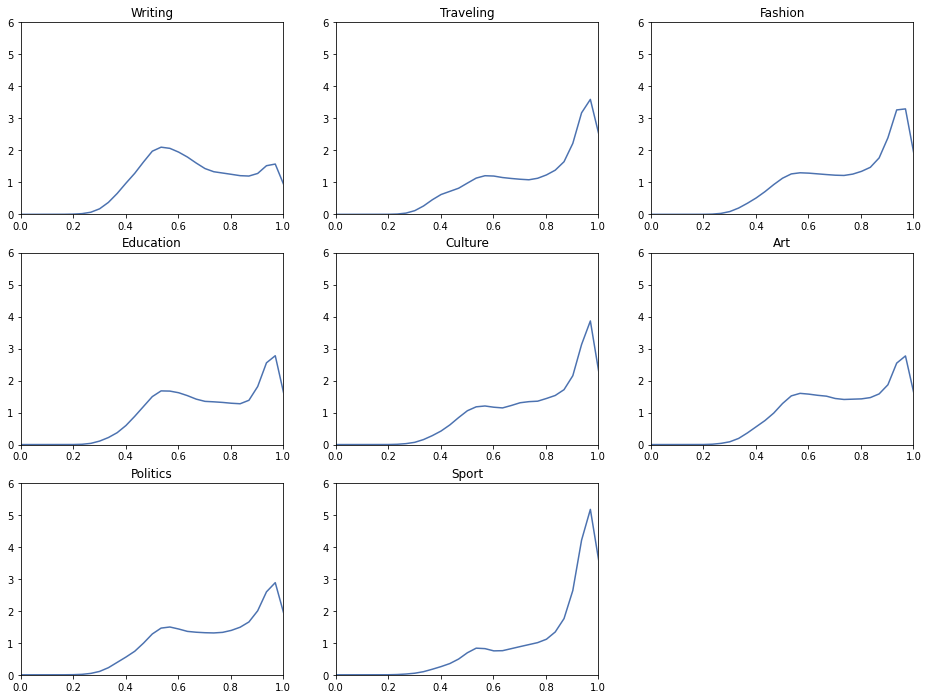

In [577]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(16,12))

for index, topic in enumerate(updated_results_final['idxmax'].unique()):
    topic_data = a['max'].get_group(topic)
    density = kde.gaussian_kde(list(topic_data))
    x = np.linspace(0 ,10,300)
    y = density(x)
# sport = a['max'].get_group('Writing')

# culture = a['max'].get_group('Culture')




    #Plot 1

    plt.subplot(3,3,index+1)

    # plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])

    plt.plot(x, y)
    plt.xlim(0, 1)
    plt.ylim(0, 6)

    plt.title(topic)

    #Plot 2

  #plt.subplot(2,2, index+1)

plt.show()
# plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])

# plt.plot([x for x in range(len(culture))], culture)

# plt.title('Amazon (AMZN)) Stock Price')

# #Plot 3

# plt.subplot(2,2,3)

# plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])

# plt.plot(dates, facebook)

# plt.title('Facebook (FB) Stock Price')

# #Plot 4

# plt.subplot(2,2,4)

# plt.xticks(np.arange(0, len(x) + 1)[::365], x[::365])

# plt.plot(dates, microsoft)

# plt.title('Microsoft (MSFT) Stock Price')

In [534]:
a['max'].get_group('Culture')


10       0.973922
14       0.603531
15       0.985572
16       0.979452
24         0.9542
           ...   
50478    0.961483
50485    0.827441
50487    0.902867
50488    0.980288
50490    0.988348
Name: max, Length: 10561, dtype: object

In [496]:
topic_data = {}
for topic in updated_results_final['idxmax'].unique():
    topic_data[topic] = updated_results_final[updated_results_final['idxmax'] == topic]['max']

# topic_data.values()

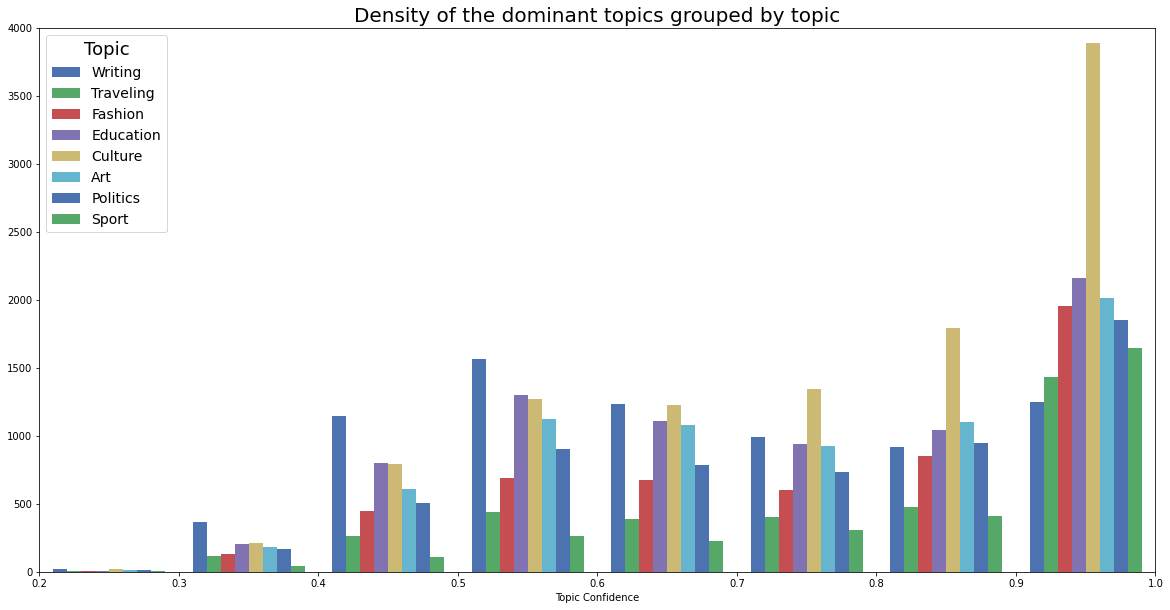

In [513]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# for topics

plt.figure(figsize=(20,10))

plt.title('Density of the dominant topics grouped by topic', fontsize=20)
plt.xlabel('Topic Confidence')
plt.ylim(0, 4000)
plt.xlim(0.2,1)
density = kde.gaussian_kde(list(updated_results_final[updated_results_final['idxmax'] == 'Politics']['max']))
bins = np.linspace(0, 1, 11)

plt.hist(topic_data.values(), bins, label=list(topic_data.keys()))
plt.legend(prop={'size': 14}, title = 'Topic', title_fontsize=18, loc='upper left')

plt.show()

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

<Figure size 1440x720 with 0 Axes>

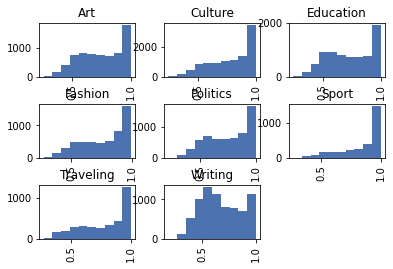

In [525]:
plt.figure(figsize=(20,10))
aupdated_results_final['max'].hist(by=updated_results_final['idxmax'])

# plt.figure(figsize=(30,20),facecolor='red',edgecolor='blue')


<AxesSubplot:ylabel='Frequency'>

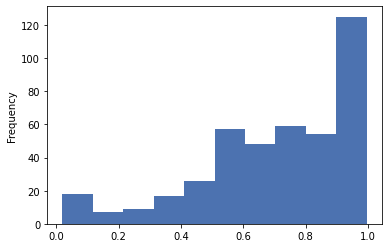

In [435]:
temp_df = chosen_city_pair_df[chosen_city_pair_df['idxmax'] == 'Art']
temp_df['max'].plot(kind="hist")

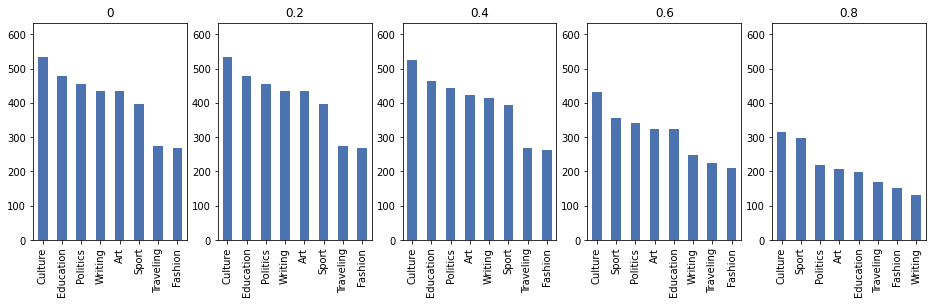

In [650]:
plt.figure(figsize=(16, 4))


temporary_df = updated_results_final[updated_results_final['city_pair']=='paris_madrid']
for index, threshold in enumerate([0, 0.2, 0.4, 0.6, 0.8]):
    thresholded_data = temporary_df['idxmax'].mask(temporary_df['max'] < threshold, 'Below threshold')
    if index == 0:
        max = thresholded_data.value_counts().max()+100
        
    plt.subplot(1,5,index+1)
    
    thresholded_data[thresholded_data != 'Below threshold'].value_counts().plot(kind="bar")
    
    plt.ylim(0, max)
    plt.title(threshold)

<AxesSubplot:>

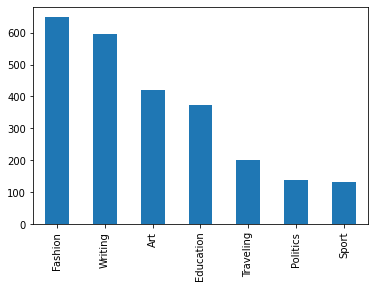

In [283]:
no_threshold = chosen_city_pair_df['idxmax']
no_threshold.value_counts().plot(kind="bar")

<AxesSubplot:>

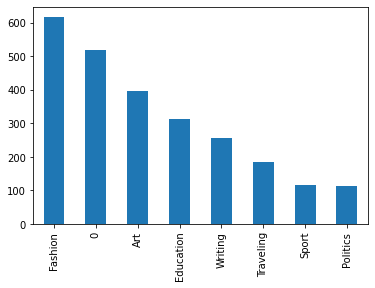

In [284]:
low_threshold = chosen_city_pair_df['idxmax'].mask(chosen_city_pair_df['max'] < 0.2, 0)
low_threshold.value_counts().plot(kind="bar")

<AxesSubplot:>

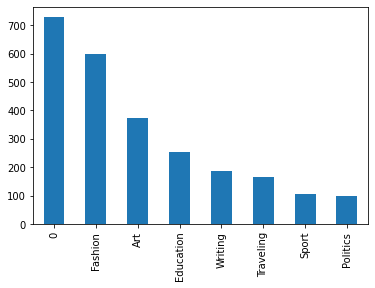

In [285]:
medium_threshold = chosen_city_pair_df['idxmax'].mask(chosen_city_pair_df['max'] < 0.4, 0)
medium_threshold.value_counts().plot(kind="bar")

<AxesSubplot:>

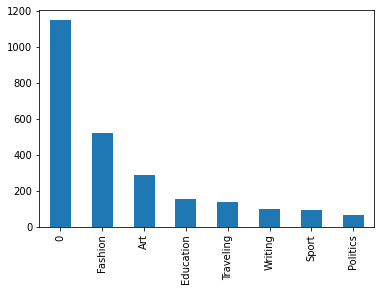

In [289]:
high_threshold = chosen_city_pair_df['idxmax'].mask(chosen_city_pair_df['max'] < 0.6, 0)
high_threshold.value_counts().plot(kind="bar")

In [168]:
chosen_city_pair_df['dominant_topic'].value_counts()

Fashion      783
Writing      708
Art          503
Education    410
Sport        351
Politics     263
Traveling    233
Name: dominant_topic, dtype: int64

In [118]:
# result[result['paragraph_id'] == 50494] #['paragraph']
# result.iloc[50493]['paragraph']
# result

,paragraph_id,city_pair,paragraph,merged_POS
0,1,berlin_milan,"after his tenure in academia, he continued to ...","[tenure, academia, month, year, travel, incide..."
1,2,berlin_milan,one of the astronomers selected for the search...,"[astronomer, search, priest, invitation, group..."
2,3,berlin_milan,there are plenty of air connections between ye...,"[plenty, air, connection, city, connection, ci..."
3,4,berlin_milan,"since 2009, 'the brandery', an urban fashion s...","[fashion, year, language, monitor, ranking, wo..."
4,5,berlin_milan,when considering the commuter belts or metropo...,"[commuter, belt, area, datum, population, orde..."
...,...,...,...,...
50491,50891,paris_milan,the impressions that he had made by his speech...,"[impression, speech, debate, invitation, repre..."
50492,50892,paris_milan,a journey to paris in 1790 provided him furthe...,"[journey, acquaintance, idea, year, city, gran..."
50493,50893,paris_milan,the 1993–94 uefa champions league was the 39th...,"[season, club, football, tournament, season, l..."
50494,50894,paris_milan,kaya has been modeling since the age of 14. sh...,"[age, street, career, fashion, world, catalogu..."


In [ ]:
# Dominant topic per paragraph
topic_distributions.idxmax(axis="columns").value_counts()

"""
topic to lydavis topic:
topic 1: topic 2: Culture
topic 2: topic 4: Education
topic 3: topic 7 Traveling
topic 4: topic 6 Fashion
topic 5: topic 1 Writing
topic 6: topic 3 Politics
topic 7: topic 8 Sport
topic 8: topic 5 Art
"""

In [94]:
model['texts']

paragraph_id
1        [tenure, academia, month, year, travel, incide...
2        [astronomer, search, priest, invitation, group...
3        [plenty, air, connection, city, connection, ci...
4        [fashion, year, language, monitor, ranking, wo...
5        [commuter, belt, area, datum, population, orde...
                               ...                        
50891    [impression, speech, debate, invitation, repre...
50892    [journey, acquaintance, idea, year, city, gran...
50893    [season, club, football, tournament, season, l...
50894    [age, street, career, fashion, world, catalogu...
50895    [art, drama, costume, clothing, designer, desi...
Name: merged_POS, Length: 50496, dtype: object

In [51]:
paris_london = topic_distributions.iloc[0:21051]
paris_london

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,0.002311,0.002249,0.001061,0.001583,0.865177,0.125048,0.000734,0.001837
1,0.001658,0.001613,0.000761,0.001136,0.938653,0.001312,0.035876,0.018992
2,0.002636,0.030673,0.956849,0.001806,0.003018,0.002086,0.000837,0.002095
3,0.058875,0.004913,0.002317,0.918505,0.005780,0.003995,0.001604,0.004012
4,0.008101,0.007883,0.953772,0.005549,0.009274,0.006410,0.002573,0.006438
...,...,...,...,...,...,...,...,...
21046,0.003667,0.003569,0.001683,0.002512,0.473346,0.002901,0.001165,0.511158
21047,0.004791,0.004662,0.002198,0.105436,0.005484,0.003791,0.001522,0.872117
21048,0.002496,0.800763,0.001145,0.001710,0.002857,0.001975,0.000793,0.188261
21049,0.020487,0.893628,0.009401,0.014033,0.023453,0.016210,0.006507,0.016281


In [56]:
paris_london.idxmax(axis="columns").value_counts()

topic_1    5293
topic_2    3129
topic_8    2880
topic_6    2475
topic_5    2269
topic_4    2101
topic_7    1613
topic_3    1291
dtype: int64

### Topic Coverage Distribution

In [ ]:
# import os

# old_file_name = "/home/career_karma/raw_data.csv"
# new_file_name = "/home/career_karma/old_data.csv"

# os.rename(old_file_name, new_file_name)

# model_path = "../../../../../data/clean/lda_models/50k_paragraphs/"
# #N_TOPICS = 8

# for folder in os.listdir(model_path):
#     path2 = os.path.join(model_path, folder)
    
#     for folder2 in os.listdir(path2):
#         old_path = os.path.join(path2, folder2)
#         old_abs_path = os.path.abspath(old_path)
#         new_path = old_abs_path.replace("0.05min", "0_05min").replace("0.9max", "0_9max")# .replace('.dict', '_dict').replace('.model', '_model')
#         new_abs_path = os.path.abspath(new_path)
        
#         os.rename(old_abs_path, new_abs_path)

In [492]:
distribution = topic_distributions_renamed_cols.mean().sort_values(ascending=False)
sorted_distribution = distribution.sort_index()
distribution

Culture      0.192494
Education    0.150960
Traveling    0.074022
Fashion      0.110553
Writing      0.153422
Politics     0.122176
Sport        0.061318
Art          0.135055
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = sorted_distribution.index
students = list(sorted_distribution)
ax.bar(langs,students)
average_topic_coverage = sum(sorted_distribution)/len(sorted_distribution)

plt.axhline(average_topic_coverage, color='grey', ls='-', label='average topic coverage')
plt.legend(loc='lower right')
plt.show()